# $$
\text{Corrigé du devoir à la maison N°2}
$$

1.a. Définir la fonction de Van der Waals $V$ donnée par
$$
\forall r > 0, \, V(r) = \frac{1}{r^{12}} - \frac{2}{r^6},
$$
sa dérivée $V'$, et les tracer sur l'intervalle $[0,8; 2]$.

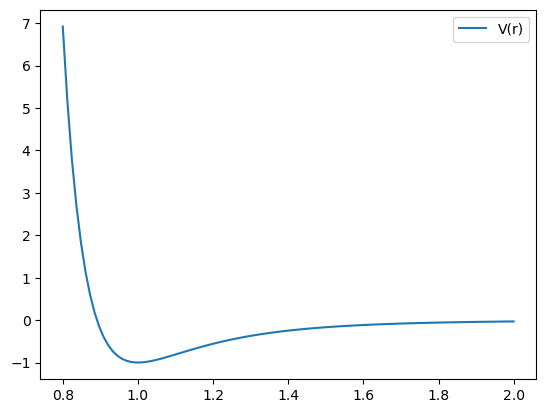

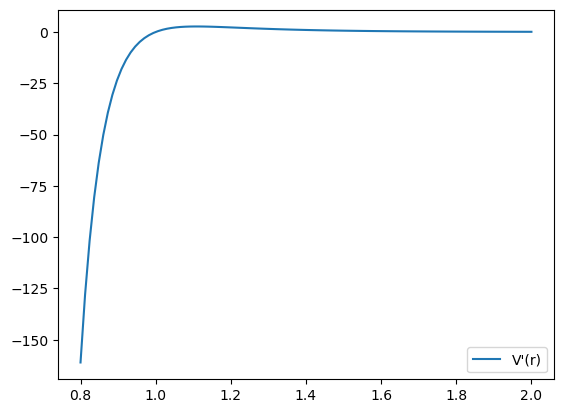

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Définition de la fonction V
def V(r):
    if r > 0:
        return 1/r**12-2/r**6
# Définition de la fonction W
def W(r):
    if r > 0:
        return 12/r**7-12/r**13
# Tracé des deux fonctions
X = np.linspace(0.8,2,100)
Y = []
for x in X:
    Y.append(V(x))
plt.plot(X,Y,label='V(r)')
plt.legend()
plt.figure(2)
Z = []
for x in X:
    Z.append(W(x))
plt.plot(X,Z,label="V'(r)")
plt.legend()
plt.show() 

b. Soit $N \geq 2$. Écrire une fonction qui prend en entrée un vecteur $X = (X_1, \ldots, X_N) \in \Omega_N$ et renvoie la valeur de la fonctionnelle de Lennard-Jones en ce vecteur
$$
LJ_N(X) = \sum_{1 \leq i < j \leq N} V \big( \| X_j - X_i \| \big).
$$

In [2]:
def LJ(X):
    N = len(X) // 3
    l = 0
    for i in range(0,N-1):
        for j in range(i+1,N):
            l = l+V(np.sqrt((X[3*j]-X[3*i])**2+(X[3*j+1]-X[3*i+1])**2+(X[3*j+2]-X[3*i+2])**2))
    return l
# Test de la fonction LJ pour deux vecteurs à distance un
X2 = np.array([0,1,0,0,0,0])
print("LJ_2(X) =",LJ(X2),"\n")

LJ_2(X) = -1.0 



c. Écrire une fonction qui prend en entrée un vecteur $ X = (X_1, \ldots, X_N) \in \Omega_N$ et renvoie le gradient de la fonctionnelle de Lennard-Jones $\nabla LJ_N$ en ce vecteur
$$
\forall 1 \leq i \leq N, \forall k \in \{ - 2, - 1, 0 \}, \big[ \nabla LJ_N(X) \big]_{3 i + k} = \sum_{j \neq i} \frac{x_{3 i + k} - x_{3 j +k}}{\| X_i - X_j \|} \, V' \big( \| X_i - X_j \| \big).
$$

In [3]:
def gradLJ(X):
    N = len(X) // 3
    G = np.zeros((3*N,))
    for i in range(0,N):
        for j in range(i+1,N):
            r = np.sqrt((X[3*j]-X[3*i])**2+(X[3*j+1]-X[3*i+1])**2+(X[3*j+2]-X[3*i+2])**2)
            G[3*i] = G[3*i]+(X[3*i]-X[3*j])*W(r)/r
            G[3*j] = G[3*j]+(X[3*j]-X[3*i])*W(r)/r
            G[3*i+1] = G[3*i+1]+(X[3*i+1]-X[3*j+1])*W(r)/r
            G[3*j+1] = G[3*j+1]+(X[3*j+1]-X[3*i+1])*W(r)/r
            G[3*i+2] = G[3*i+2]+(X[3*i+2]-X[3*j+2])*W(r)/r
            G[3*j+2] = G[3*j+2]+(X[3*j+2]-X[3*i+2])*W(r)/r
    return G
# Test de la fonction gradLJ pour trois vecteurs
X3 = np.array([0,1,0,0,0,1,1,0,0])
print("gradLJ_3(X) =",gradLJ(X3),"\n")

gradLJ_3(X) = [-0.65625  1.3125  -0.65625 -0.65625 -0.65625  1.3125   1.3125  -0.65625
 -0.65625] 



d. Vérifier le fonctionnement de ces deux fonctions sur un exemple bien choisi.

In [4]:
# Test des fonctions LJ et gradLJ pour un triangle équilatéral
Y = np.array([0,0,0,1,0,0,0.5,np.sqrt(3)/2,0])
print("LJ_3(Y) =",LJ(Y),"\n")
print("gradLJ_3(Y) =",gradLJ(Y),"\n")

LJ_3(Y) = -3.0 

gradLJ_3(Y) = [ 4.44089210e-15  7.69185075e-15  0.00000000e+00 -4.44089210e-15
  7.69185075e-15  0.00000000e+00  0.00000000e+00 -1.53837015e-14
  0.00000000e+00] 



2.a. Soit $\rho = 0,3$ et $\beta = 0,0001$. Écrire une fonction qui prend en entrée un vecteur $X = (X_1, \ldots, X_N) \in \Omega_ N$ et renvoie un nombre $\alpha > 0$ tel que
$$
LJ_N \big( X - \alpha \nabla LJ_N(X) \big) < LJ_N(X) - \beta \alpha \| \nabla LJ_N(X) \|^2.
$$

In [5]:
t = 0.3
b = 0.0001
def alpha(X):
    f = LJ(X)
    d = gradLJ(X)
    n = np.linalg.norm(d)
    a = 1/n
    Y = X-a*d
    err = LJ(Y)-f+b*a*n**2
    while err >= 0:
        a = t*a
        Y = X-a*d
        err = LJ(Y)-f+b*a*n**2
    return a
# Test de la fonction alpha pour quatre vecteurs aléatoires
X4 = np.random.randn(9,)
a4 = alpha(X4)
print("alpha =",a4)
print("Condition d'Armijo =",LJ(X4-a4*gradLJ(X4))-LJ(X4)+b*a4*np.linalg.norm(gradLJ(X4))**2,"\n")

alpha = 4.496050920481707
Condition d'Armijo = -0.04271513535211412 



b. Écrire une fonction qui prend entrée un entier $N \geq 2$ et une erreur $\varepsilon > 0$, et renvoie une valeur approchée du minimum de la fonctionnelle de Lennard-Jones $LJ_N$ par la méthode de la plus forte pente.

In [6]:
def Pente(N,eps):
    X = np.random.randn(3*N,)
    a = alpha(X)
    Y = X-a*gradLJ(X)
    err = LJ(Y)-LJ(X)+b*a*np.linalg.norm(gradLJ(X))**2
    while err < -eps:
        X = Y
        a = alpha(X)
        Y = X-a*gradLJ(X)
        err = LJ(Y)-LJ(X)+b*a*np.linalg.norm(gradLJ(X))**2
    return Y
# Test de la fonction Pente pour N=2
N = 2
eps = 0.0000000001
Y = Pente(N, eps)
print("LJ_2(Y) =",LJ(Y),"\n")
print("GradLJ_2(Y) =",gradLJ(Y),"\n")

LJ_2(Y) = -0.9999999993918413 

GradLJ_2(Y) = [ 8.29507430e-05  5.03212508e-05 -2.79565309e-04 -8.29507430e-05
 -5.03212508e-05  2.79565309e-04] 



c. Vérifier le fonctionnement de cette fonction lorsque $N = 3$ et $N = 4$.

In [7]:
N = 3
Y = Pente(N, eps)
print("LJ_3(Y) =",LJ(Y),"\n")
print("GradLJ_3(Y) =",gradLJ(Y),"\n")
N = 4
Y = Pente(N, eps)
print("LJ_4(Y) =",LJ(Y),"\n")
print("GradLJ_4(Y) =",gradLJ(Y),"\n")

LJ_3(Y) = -2.9999999999928253 

GradLJ_3(Y) = [ 4.42833097e-06  1.43477298e-06  2.01331562e-05 -3.06868131e-06
 -2.20285562e-05 -8.39220393e-06 -1.35964966e-06  2.05937833e-05
 -1.17409523e-05] 

LJ_4(Y) = -5.9999999999480575 

GradLJ_4(Y) = [-1.15406983e-05  2.33441947e-05 -3.79716562e-05  1.85136713e-05
 -4.17971099e-05 -5.49830922e-06  3.44286638e-05  1.97185361e-05
  2.33630474e-05 -4.14016367e-05 -1.26562092e-06  2.01069180e-05] 

